In [1]:
import sys
import os.path as op
module_path = op.abspath(op.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from scipy.io import loadmat
import hypyp
import mne
import numpy as np

from data_analysis.functions_connectivity import \
    plot_connectivity_matrix
from data_analysis.functions_behavioral import \
    (create_event_df, remove_ghost_triggers, calculate_alpha,
     join_event_dfs, remove_outliers, events_from_event_df)

import matplotlib.pyplot as plt

result_dir = "/net/store/nbp/projects/hyperscanning/study_project/results/"

In /net/store/nbp/projects/hyperscanning/study_project/programming_tools/miniconda3/envs/hyperscanning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /net/store/nbp/projects/hyperscanning/study_project/programming_tools/miniconda3/envs/hyperscanning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /net/store/nbp/projects/hyperscanning/study_project/programming_tools/miniconda3/envs/hyperscanning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /net/store/nbp/projects/hyperscanning/study_project

In [2]:
subj = 203
cond = "early"
ispcs = loadmat(op.join(result_dir, "ispc_matrices", str(subj) + "_" + cond + ".mat"))[cond]

#mne.viz.plot_

In [3]:
ispcs[0, :, :, 0].shape

(128, 128)

In [3]:
tfr = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", str(subj) + "_" + cond))[0]

Reading /net/store/nbp/projects/hyperscanning/study_project/results/phase_angles/203_early ...


<ipython-input-3-f30baabdb29c>:1: RuntimeWarning: This filename (/net/store/nbp/projects/hyperscanning/study_project/results/phase_angles/203_early) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5 or _tfr.h5
  tfr = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", str(subj) + "_" + cond))[0]


Not setting metadata


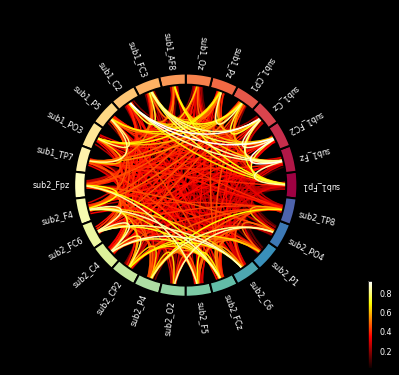

<Figure size 432x288 with 0 Axes>

In [12]:
mne.viz.plot_connectivity_circle(ispcs[0, ::5, ::5, 0], node_names=tfr.ch_names[::5])
plt.savefig('connectivity_circle_{}.pdf'.format(subj)) 

In [7]:
avg_ispcs = np.mean(ispcs, axis=0)

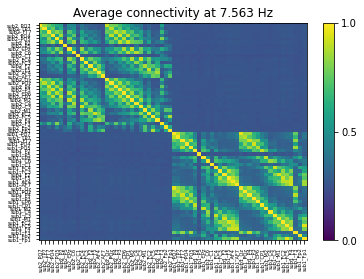

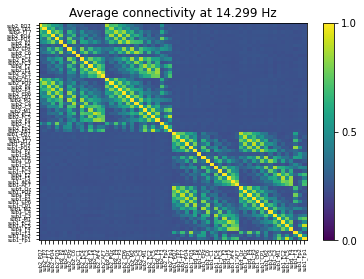

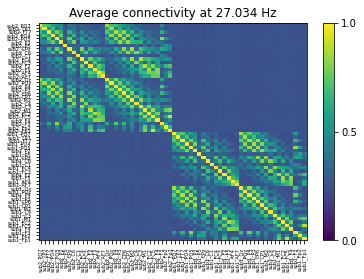

In [9]:
freq_i = 5
plot_connectivity_matrix(avg_ispcs[::2, ::2, freq_i], node_names=tfr.ch_names[::2],
                         title="Average connectivity at {} Hz".format(np.round(tfr.freqs[freq_i], 3)))
#plt.savefig('{}_connectivity_matrix_frequ{}.pdf'.format(subj,freq_i)) 

freq_i = 10
plot_connectivity_matrix(avg_ispcs[::2, ::2, freq_i], node_names=tfr.ch_names[::2],
                         title="Average connectivity at {} Hz".format(np.round(tfr.freqs[freq_i], 3)))

freq_i = 15
plot_connectivity_matrix(avg_ispcs[::2, ::2, freq_i], node_names=tfr.ch_names[::2],
                         title="Average connectivity at {} Hz".format(np.round(tfr.freqs[freq_i], 3)))

Intra vs Inter brain bar plots

In [ ]:
inter_b = [np.mean(avg_ispcs[0:64, 64:2*64, i]) for i in range(len(tfr.freqs))]
intra_b = [np.mean(avg_ispcs[0:64, 0:64, i]) for i in range(len(tfr.freqs))]

In [ ]:
plt.plot(tfr.freqs, inter_b, tfr.freqs, intra_b)
plt.legend(["inter", "intra"])

In [ ]:
x = tfr.freqs  # the label locations
width = np.diff(x) # the width of the bars
width = np.append(width, [5.5], axis = 0)
width /=3

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, inter_b, width, label='Inter-Brain',align="edge")
rects2 = ax.bar(x + width/2, intra_b, width, label='Intra-Brain',align="edge")

labels = [str(round(i,2)) for i in tfr.freqs]


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ISPCs')
ax.set_title('Average Inter- vs. intrabrain connectivity strength (ISPC) over Frequency Bands')
ax.set_xscale('log')
ax.set_xticks(x+width)
ax.set_xticklabels(labels)


#ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

#todo: bin frequencies and make a bar plot of data

## load and plot the Small world indices

In [ ]:
swis = loadmat(op.join(result_dir, "small_worlds", str(subj) + "_" + cond + ".mat"))[cond]

avg_swis = np.mean(swis, axis=0)

plt.plot(tfr.freqs, avg_swis)
plt.title("SWI over frequencies for subject pair {}".format(subj))
plt.xlabel("Frequency in Hz")
plt.ylabel("SWI")

## load the behavioral data and bad trials (which were filtered by autoreject)

In [ ]:
import pandas
import glob


behav_path = "/net/store/nbp/projects/hyperscanning/study_project/dirk/NBP_Hyperscanning/data_analysis/Behavioural_Analysis/BehaviouralData"

df = pandas.read_csv(op.join(behav_path, str(subj) + ".csv"))


In [ ]:
# do the behavioral analysis and get the epochs
df = calculate_alpha(df)

In [ ]:
# remove all the trials that were removed by autoreject
bad_trials = loadmat(op.join(result_dir, "dropped_epochs", str(subj) + ".mat"))
remove = list(bad_trials["drop_list"] +1)
df[np.logical_not(df["trial"].isin(remove))]
df

In [ ]:
behavioral_df

# save time of first and last tap per trial in dataframe
first_tap = behavioral_df.index - behavioral_df.index[behavioral_df.index%9]
#behavioral_df["first_tap"] = behavioral_df["ttap"][first_tap].to_numpy()
#last_tap = behavioral_df.index - behavioral_df.index[(behavioral_df.index%9)] +8
#behavioral_df["last_tap"] = behavioral_df["ttap"][last_tap].to_numpy()

first_tap

### Save all dropped data 

In [ ]:
import pandas as pd
import os
import glob
behav_res_path = "/net/store/nbp/projects/hyperscanning/study_project/anne/NBP_Hyperscanning/data_analysis/Behavioural_Analysis/BehaviouralData_Alphas/Trials_with_double_taps/"

For all pairs

In [ ]:
pair_list = pd.read_csv('pair_list.csv')

for pair in pair_list.pair_name[6:]:
    print("Pair {}:".format(pair))
    df_doubletaps_trials = pd.read_csv(op.join(behav_res_path, str(pair) + "_lost_taps.csv"))
    print("Amount of lost trials due to double taps:",round(len(df_doubletaps_trials)/3,2),"%")

    bad_trials = loadmat(op.join(result_dir, "dropped_epochs", str(pair) + ".mat"))
    bad_trials = [item for sublist in bad_trials["drop_list"] for item in sublist]
    print("Amount of lost trials due to EEG cleaning:",round(len(bad_trials)/3,2),"%")

    combine_bads = list(bad_trials)
    combine_bads.extend(x for x in df_doubletaps_trials.trial if x not in combine_bads)
    print("Total amount of lost trials:",round(len(combine_bads)/3,2),"%", "\n")




## Make tests with ISCPs

In [ ]:
subj = 206
phases_early = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", str(subj) + "_" + "early"))[0]
phases_late = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", str(subj) + "_" + "late"))[0]


#mne.viz.plot_

Reading /net/store/nbp/projects/hyperscanning/study_project/results/phase_angles/206_early ...
